<table>
<tr>    
<td style="text-align: center">
<h1>Sequential Data, Text Processing, NLP, and Word Embeddings</h1>
<h2><a href="http://home.agh.edu.pl/~horzyk/index.php">Adrian Horzyk</a></h2>
</td> 
<td>
<img src="http://home.agh.edu.pl/~horzyk/im/AdrianHorzyk49BT140h.png" alt="Adrian Horzyk, Professor" title="Adrian Horzyk, Professor" />        
</td> 
</tr>
</table>
<h3><i>Welcome to the interactive lecture and exercises where you can check everything by yourself and experiment!</i></h3>

# Sequential Data

__Sequential data__ are the second type of the most frequently used data in real-world applications because many processes, signals and input data are ordered in time or for any other reasons, so we need to use this special relationship between simple or object data that puts them in order. This order has a special meaning when classifying, predicting, translating, transforming or doing any other operation on such sequential data.

__Sequential data__ are used in speech recognition, music generation, automatic proof-reading and text correction, sentiment classification, DNA sequence analysis, ECG and EEG signals classification, machine translation, video activity recognition, and many others.

![examples of sequential data](http://home.agh.edu.pl/~horzyk/lectures/jupyternotebooks/images/SequentialDataExamples.png)

# Word One-hot Encoding

__Words in Sentences__ are a typical example of sequences of objects. How do we typically represent words in deep learning?
One of the most popular ways of word representation is __one-hot encoding__ that assumes the representation of each word by a pretty long vector (which size depends on the number of words we want to recognize, e.g. 10.000 or 50.000). Each word vector consists of such a number of fields as many words we represent. Each represented word has an exact position in this vector, so each word is represented by the vector containing almost everywhere zeros (0) with regards to one position representing this word where is one (1). We order the words in the vector alphabetically or according to their frequency in the language (after a chosen frequency word dictionary to limit the words to the most frequently used), e.g.:

![one-hot vectors for word-frequency dictionary](http://home.agh.edu.pl/~horzyk/lectures/jupyternotebooks/images/One-hot_vectors_for_sorted_word-frequency_dictionary.png)

One-hot encoding is the most common, most basic way to turn a token (word) into a vector. You already saw it in action in our initial IMDB and Reuters examples. It consists of associating a unique integer index to every word, then turning this integer index _i_ into a binary vector of size _N_, which is the size of the used vocabulary. This vector would be all-zeros except for the i-th entry (position, field), which would be 1.

Of course, one-hot encoding can be done at the character level as well. To unambiguously drive home what one-hot encoding is and how to implement it, here are two toy examples of one-hot encoding: one for words and the other for characters:

In [1]:
import tensorflow as tf
import keras

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

TensorFlow version: 2.8.0
Keras version: 2.8.0


In [2]:
# Word level one-hot encoding example:
import numpy as np

# This is our initial data: one entry per "sample" that is just a sentence, but it could be an entire document as well.
samples = ['The mouse came out of the hole and ate my breakfast.',
           'The dog sat on the mat and ate my lunch.',
           'The cat lipped through the window and ate my dinner.']
punctuation = ['.', '?', '!', ',', ';', ':']

# First, we need to build an index of all tokens (words) in the data samples.
token_index = {}
for sample in samples:
    # We simply tokenize the samples via the `split` method.
    for word in sample.split():
        # Let's strip punctuation and special characters from the samples and make them lowercased.
        for mark in punctuation:
            word = word.replace(mark,'').lower()
        # Add a new token (word) into the token_index and associate it with its index number.
        if word not in token_index:
            # Assign a unique index to each unique word
            token_index[word] = len(token_index) + 1
        # Note that we don't attribute index 0 to anything!
print ("Token index: ", token_index)

# Next, we vectorize our samples, i.e. we create one-hot vectors for each word.
# We will only consider the first `max_length` words in each sample.
max_length = 10

# This is where we store our results:
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    print (sample)
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # Let's strip punctuation and special characters from the samples and make them lowercased.
        for mark in punctuation:
            word = word.replace(mark,'').lower()
        # Get index of the word out of the token_index dictionary
        index = token_index.get(word)
        results[i, j, index] = 1.
        print (results[i, j], " ", word)
print ("\nThe final results:")
print (results)

Token index:  {'the': 1, 'mouse': 2, 'came': 3, 'out': 4, 'of': 5, 'hole': 6, 'and': 7, 'ate': 8, 'my': 9, 'breakfast': 10, 'dog': 11, 'sat': 12, 'on': 13, 'mat': 14, 'lunch': 15, 'cat': 16, 'lipped': 17, 'through': 18, 'window': 19, 'dinner': 20}
The mouse came out of the hole and ate my breakfast.
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   the
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   mouse
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   came
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   out
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   of
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   the
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   hole
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   and
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   ate
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

So, you could see the generated one-hot vectors for the words (tokens or sequence objects).

In [3]:
# Character level one-hot encoding example:
import string
characters = string.printable  # All printable ASCII characters.
token_index = dict(zip(characters, range(1, len(characters) + 1)))
print (token_index)

samples = ['The mouse came out of the hole and ate my breakfast.',
           'The dog sat on the mat and ate my lunch.',
           'The cat lipped through the window and ate my dinner.']

max_length = 36
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:max_length]):
        index = token_index.get(character)
        results[i, j, index] = 1.
        print (results[i, j], " ", character)

{'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, 'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 31, 'v': 32, 'w': 33, 'x': 34, 'y': 35, 'z': 36, 'A': 37, 'B': 38, 'C': 39, 'D': 40, 'E': 41, 'F': 42, 'G': 43, 'H': 44, 'I': 45, 'J': 46, 'K': 47, 'L': 48, 'M': 49, 'N': 50, 'O': 51, 'P': 52, 'Q': 53, 'R': 54, 'S': 55, 'T': 56, 'U': 57, 'V': 58, 'W': 59, 'X': 60, 'Y': 61, 'Z': 62, '!': 63, '"': 64, '#': 65, '$': 66, '%': 67, '&': 68, "'": 69, '(': 70, ')': 71, '*': 72, '+': 73, ',': 74, '-': 75, '.': 76, '/': 77, ':': 78, ';': 79, '<': 80, '=': 81, '>': 82, '?': 83, '@': 84, '[': 85, '\\': 86, ']': 87, '^': 88, '_': 89, '`': 90, '{': 91, '|': 92, '}': 93, '~': 94, ' ': 95, '\t': 96, '\n': 97, '\r': 98, '\x0b': 99, '\x0c': 100}
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.

Note that Keras has built-in utilities for doing one-hot encoding text at the word level or character level, starting from raw text data. This is what you should actually be using, as it will take care of a number of important features, such as stripping special characters from strings or only taking into the top N most common words in your dataset. This common restriction is to avoid dealing with very large input vector spaces.

Using Keras for word-level one-hot encoding:

In [4]:
from keras.preprocessing.text import Tokenizer

samples = ['The mouse came out of the hole and ate my breakfast.',
           'The dog sat on the mat and ate my lunch.',
           'The cat lipped through the window and ate my dinner.']

# We create a tokenizer, configured to only take into account the top-1000 most common words
tokenizer = Tokenizer(num_words=1000)
# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)
print ("sequences")
print (sequences)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are also supported if necessary.
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
print ("one_hot_results")
print (one_hot_results)

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

sequences
[[1, 5, 6, 7, 8, 1, 9, 2, 3, 4, 10], [1, 11, 12, 13, 1, 14, 2, 3, 4, 15], [1, 16, 17, 18, 1, 19, 2, 3, 4, 20]]
one_hot_results
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
Found 20 unique tokens.


A variant of one-hot encoding is the so-called __"one-hot hashing trick"__, which can be used when the number of unique tokens in your vocabulary is too large to handle explicitly. Instead of explicitly assigning an index to each word and keeping a reference of these indices in a dictionary, one may hash words into vectors of fixed size. This is typically done with a very lightweight hashing function. 
The main advantage of this method is that it does away with maintaining an explicit word index, which saves memory and allows online encoding of the data (starting to generate token vectors right away, before having seen all of the available data). The one drawback of this method is that it is susceptible to "hash collisions": two different words may end up with the same hash, 
and subsequently, any machine learning model looking at these hashes won't be able to see the difference between these words. The likelihood of hash collisions decreases when the dimensionality of the hashing space is much larger than the total number of unique tokens being hashed.

In [5]:
# Word-level one-hot encoding with hashing trick example:
samples = ['The mouse came out of the hole and ate my breakfast.',
           'The dog sat on the mat and ate my lunch.',
           'The cat lipped through the window and ate my dinner.']

# We will store our words as vectors of size 1000. Note that if you have close to 1000 words (or more)
# you will start seeing many hash collisions, which will decrease the accuracy of this encoding method.
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # Hash the word into a "random" integer index that is between 0 and 1000
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.
        print (results[i, j], " ", word)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

# Using word embeddings

Another popular and powerful way to associate a vector with a word is the use of __dense "word vectors"__, also called __"word embeddings"__. 
While the vectors obtained through one-hot encoding are binary, sparse (mostly made of zeros) and very high-dimensional (same dimensionality as the number of words in the vocabulary), "word embeddings" are low-dimensional floating-point vectors 
(i.e. "dense" vectors, as opposed to sparse vectors). Unlike word vectors obtained via one-hot encoding, word embeddings are learned from data. It is common to see word embeddings that are 256-dimensional, 512-dimensional, or 1024-dimensional when dealing with very large vocabularies. 

On the other hand, one-hot encoding words generally leads to vectors that are 10,000-dimensional or higher (capturing a vocabulary of 10,000 tokens in this case). So, word embeddings pack more information into far fewer dimensions. 

The comparison of one-hot and word embeddings codings:

![one-hot vectors for word-frequency dictionary](http://home.agh.edu.pl/~horzyk/lectures/jupyternotebooks/images/ComparisonOfOne-hotAndWordEmbeddings.png)

There are two ways to obtain word embeddings:

* Learn __word embeddings__ jointly with the main task you care about (e.g. document classification or sentiment prediction). 
In this setup, you would start with random word vectors, then learn your word vectors in the same way that you learn the weights of a neural network.
* Load into your model word embeddings that were pre-computed using a different machine learning task than (transfer word embeddings) the one you are trying to solve. These are called __"pre-trained word embeddings"__. 

Let's take a look at both.

## Learning word embeddings with the `Embedding` layer

The trained embedding space should have a structure: for instance, the words "accurate" and "exact" are interchangeable in most sentences, so they should be close in the embedding space. The geometric relationships between word vectors should reflect the semantic relationships between these words and all others.

Word embeddings are meant to map human language into a geometric space. In a reasonable embedding space, we would expect synonyms to be embedded into similar word vectors. In general, we would expect the geometric distance (e.g. L2 distance, also known as the Euclidean norm) between any two-word vectors to relate to __the semantic distance of the associated words__. Words meaning very different things would be embedded to points far away from each other, while related words would be close. Even beyond mere distance, we may want specific __directions__ in the embedding space to be meaningful. 

In real-world word embedding spaces, common examples of meaningful geometric transformations are "gender vectors" and "plural vector". For instance, by adding a "female vector" to the vector "king", one obtains the vector "queen". By adding a "plural vector", one obtains "kings". Word embedding spaces typically feature thousands of such interpretable and potentially useful vectors.

![word embeddings](http://home.agh.edu.pl/~horzyk/lectures/jupyternotebooks/images/Word_Embeddings.png)

Is there some "ideal" word embedding space that would perfectly map human language and could be used for any __natural language processing (NLP)__ task? Nobody has yet computed anything of the sort. Moreover, there are many different languages, and they are not isomorphic, as a language is the reflection of a specific culture and a specific context. But more pragmatically, what makes a good word embedding space depends heavily on your task: the perfect word embedding space for an English-language movie review sentiment analysis model may look very different from the perfect embedding space for an English-language legal document classification model because of the importance of certain __semantic relationships__ varies from task to task.

It is thus reasonable to __learn__ a new embedding space with every new task. Thankfully, __backpropagation__ makes this really easy, and Keras makes it even easier. It's just about learning the weights of a layer: the `Embedding` layer.

In [6]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here we set it to 1000 (which means: 1 + maximum word index),
# and the dimensionality of the embeddings, here we set it to 64.
embedding_layer = Embedding(1000, 64)

The `Embedding` layer is best understood as __a dictionary mapping integer indices__ (which stand for specific words) __to dense vectors__. It takes as input integers, it looks up these integers into an internal dictionary, and it returns the associated vectors. It's effectively __a dictionary lookup__.

The `Embedding` layer takes as input a 2D tensor of integers, of shape `(samples, sequence_length)`, where each entry is a sequence of integers. It can embed sequences of variable lengths, so for instance, we could feed into our embedding layer above batches that could have shapes `(32, 10)` (batch of 32 sequences of length 10) or `(64, 15)` (batch of 64 sequences of length 15). All sequences in a batch must have the same length, though (since we need to pack them into a single tensor), so sequences that are shorter than others should be padded with zeros, and sequences that are longer should be truncated.

This layer returns a 3D floating-point tensor of shape `(samples, sequence_length, embedding_dimensionality)`. Such a 3D tensor can then be processed by an RNN layer or a 1D convolution layer (both will be introduced here).

When you instantiate an `Embedding` layer, its weights (its internal dictionary of token vectors) are initially random, just like with any other layer. During training, these word vectors will be gradually adjusted via backpropagation, structuring the space into something that the downstream model can exploit. Once fully trained, your embedding space will show a lot of structure - a kind of structure specialized for the specific problem you were training your model for.

Let's apply this idea to the IMDB movie review sentiment prediction task that you are already familiar with. Let's quickly prepare the data. We will restrict the movie reviews to the top 10,000 most common words (like we did the first time we worked with this dataset), and cut the reviews after only 50 words. Our network will simply learn 8-dimensional embeddings for each of the 10,000 words, turn the input integer sequences (2D integer tensor) into embedded sequences (3D float tensor), flatten the tensor to 2D, and train a single `Dense` layer on top for classification.

In [7]:
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words (among top max_features most common words)
maxlen = 100

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [8]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer, so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# Finally, we add the classifier on top
model.add(Dense(8, activation='sigmoid'))#added
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2) #82-83%

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 8)                 6408      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 86,417
Trainable params: 86,417
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
625/625 [==============================] - 2s 2ms/step - loss: 0.5936 - acc: 0.7036 - val_loss: 0.4277 - val_acc: 0.8278
Epoch 2/20
625/625 [==============================] 

After 20 epochs, we get to a validation accuracy of ~82%, which is pretty good considering that we only look at the first 100 words in every review. But note that merely flattening the embedded sequences and training a single `Dense` layer on top leads to a model that treats each word in the input sequence separately, without considering inter-word relationships and structure sentence (e.g. it would likely treat both _"this movie is __shit__"_ and _"this movie presents the problems with the __shit__ expelling of older patients"_ as being negative "reviews" because of the used word "shit", not taking into account the context of it). It would be much better to add recurrent layers or 1D convolutional layers on top of the embedded sequences to learn features that take into account each sequence as a whole. We focus on this shortly.

## Using pre-trained word embeddings


Sometimes, we have so little training data available that we could never use our data alone to learn an appropriate task-specific embedding of our vocabulary. In such cases, instead of learning word embeddings jointly with the problem we want to solve, we could be loading embedding vectors from a pre-computed embedding space known to be highly-structured and to exhibit useful properties that capture generic aspects of a language structure. The rationale behind using __pre-trained word embeddings__ in natural language processing is very much the same as for using pre-trained convnets (transfer learning) in image classification: we don't have enough data available to learn truly powerful features on our own, but we expect the features that we need to be fairly generic, i.e. common visual features or semantic features. In this case, it makes sense to reuse features learned on a different, richer problem than our is.

Such __word embeddings__ are generally computed using __word occurrence statistics__ (observations about what words co-occur in sentences or documents), using a variety of techniques, some involving neural networks, others not. The idea of a dense, low-dimensional embedding space for words, computed in an unsupervised way, was initially explored by Bengio et al. in the early 2000s, but it only started really taking off in research and industry applications after the release of one of the most famous and successful word embedding scheme: __the Word2Vec algorithm__ (https://code.google.com/archive/p/word2vec), developed by Mikolov at Google in 2013. __Word2Vec dimensions__ capture specific semantic properties, e.g. gender.

There are various pre-computed databases of word embeddings that we can download and start using in a Keras `Embedding` layer. Word2Vec is one of them. Another popular one is the Global Vectors for Word Representation, called __"GloVe"__ (https://nlp.stanford.edu/projects/glove), developed by Stanford researchers in 2014. It is an embedding technique based on factorizing a matrix of word co-occurrence statistics. Its developers have made available pre-computed embeddings for millions of English tokens, obtained from Wikipedia data or from Common Crawl data.

Let's take a look at how you can get started using GloVe embeddings in a Keras model. The same method will, of course, be valid for Word2Vec embeddings or any other word embedding database that you can download. We will also use this example to refresh the text tokenization techniques we introduced above. Let's start from raw text and work our way up.

## From raw text to word embeddings

We will be using a model similar to the one we just went over - embedding sentences in sequences of vectors, flattening them and training a `Dense` layer on top. But we will do it using pre-trained word embeddings, and instead of using the pre-tokenized IMDB data packaged in Keras, we will start from scratch by downloading the original text data.

### Download the IMDB data as a raw text

First, head to http://ai.stanford.edu/~amaas/data/sentiment/ or https://ai.stanford.edu/~amaas/data/sentiment/ and download the raw IMDB dataset ("IMDB dataset", Large Movie Review Dataset). Uncompress it.

Now, let's collect the individual training reviews into a list of strings, one string per review, and let's also collect the review labels (positive / negative) into a `labels` list:

In [9]:
import os

imdb_dir = 'C:/ml/data/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding ="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

### Tokenize the data

Let's vectorize the texts we collected and prepare a training and validation split.

Because pre-trained word embeddings are meant to be particularly useful on problems where little training data is available (otherwise, task-specific embeddings are likely to outperform them), we will add the following twist: we restrict the training data to its first 2000 samples. So we will be learning to classify movie reviews after looking at just 2000 examples!

In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = 2000  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10,000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set, but first, shuffle the data,
# since we started from data where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


## Download the GloVe word embeddings


Head to https://nlp.stanford.edu/projects/glove/ (where you can learn more about the GloVe algorithm, find different pre-trained word vectors), and download the pre-computed embeddings from 2014 English Wikipedia, named `glove.6B.zip`, containing 500, 100, 200, and 300-dimensional embedding vectors for 400,000 words (or non-word tokens). Un-zip it and set the right directory to the code below. We will use 200-dimensional embedding vectors, but you can try to use a different one

### Pre-process the embeddings

Let's parse the un-zipped file (it's a `txt` file) to build an index mapping words (as strings) to their vector representation (as number vectors).

In [11]:
glove_dir = 'C:/ml/data/glove'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.200d.txt'), encoding ="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.



Now let's build an embedding matrix that we will be able to load into an `Embedding` layer. It must be a matrix of shape `(max_words, embedding_dim)`, where each entry `i` contains the `embedding_dim`-dimensional vector for the word of index `i` in our reference word index (built during tokenization). Note that the index `0` is not supposed to stand for any word or token - it's a placeholder.

In [12]:
embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

### Define a model

We will be using the same model architecture as before:

In [13]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras import regularizers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dropout(0.125)) #+
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 200)          2000000   
                                                                 
 flatten_1 (Flatten)         (None, 20000)             0         
                                                                 
 dropout (Dropout)           (None, 20000)             0         
                                                                 
 dense_2 (Dense)             (None, 16)                320016    
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,320,033
Trainable params: 2,320,033
Non-trainable params: 0
_________________________________________________________________


### Load the GloVe embeddings in the model

The `Embedding` layer has a single weight matrix: a 2D float matrix where each entry `i` is the word vector meant to be associated with index `i`. Let's just load the GloVe matrix we prepared into our `Embedding` layer, the first layer in our model:

### Train and evaluate

Let's compile our model and train it:

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights(glove_dir + '/' + 'pre_trained_glove_model.h5')

Epoch 1/40
63/63 [==============================] - 3s 42ms/step - loss: 0.7163 - acc: 0.5725 - val_loss: 0.6894 - val_acc: 0.6573
Epoch 2/40
63/63 [==============================] - 2s 39ms/step - loss: 0.3880 - acc: 0.9555 - val_loss: 0.6151 - val_acc: 0.7277
Epoch 3/40
63/63 [==============================] - 2s 35ms/step - loss: 0.1455 - acc: 0.9970 - val_loss: 0.6115 - val_acc: 0.7313
Epoch 4/40
63/63 [==============================] - 2s 35ms/step - loss: 0.0852 - acc: 1.0000 - val_loss: 0.5552 - val_acc: 0.7561
Epoch 5/40
63/63 [==============================] - 2s 31ms/step - loss: 0.0568 - acc: 1.0000 - val_loss: 0.5274 - val_acc: 0.7614
Epoch 6/40
63/63 [==============================] - 2s 32ms/step - loss: 0.0398 - acc: 1.0000 - val_loss: 0.5031 - val_acc: 0.7777
Epoch 7/40
63/63 [==============================] - 2s 33ms/step - loss: 0.0295 - acc: 1.0000 - val_loss: 0.5788 - val_acc: 0.7337
Epoch 8/40
63/63 [==============================] - 2s 32ms/step - loss: 0.0232 - a

In [15]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Additionally, we freeze the embedding layer (setting its `trainable` attribute to `False`) because `Embedding` layers of a model are pre-trained, and the other parts are randomly initialized (our classifier). The pre-trained parts should not be updated during training to avoid forgetting what they already have learned. The large gradient update triggered by the randomly initialized layers would be very disruptive to the already learned features in the `Embedding` layers.

Let's plot its performance over time:

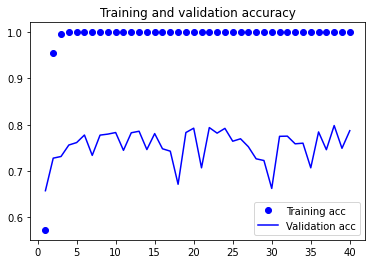

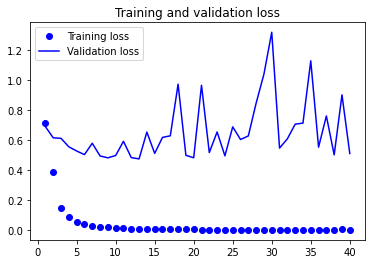

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


The model quickly starts overfitting, unsurprisingly given the small number of training samples. Validation accuracy has a high variance for the same reason but seems to reach almost 80%.

Note that your mileage may vary: since we have so few training samples, performance is heavily dependent on which exact 2000 samples of those shuffled we picked, and we picked them at random. If it worked really poorly for you, try picking a different random set of 2000 samples, just for the sake of the exercise (in real life, you don't get to pick your training data).

We can also try to train the same model without loading the pre-trained word embeddings and without freezing the embedding layer. In that case, we would be learning a task-specific embedding of our input tokens, which is generally more powerful than pre-trained word embeddings when lots of data is available. However, in our case, we have only 2000 training samples. Let's try it:

In [17]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dropout(0.125))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 200)          2000000   
                                                                 
 flatten_2 (Flatten)         (None, 20000)             0         
                                                                 
 dropout_1 (Dropout)         (None, 20000)             0         
                                                                 
 dense_4 (Dense)             (None, 16)                320016    
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,320,033
Trainable params: 2,320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
63/63 [==========================

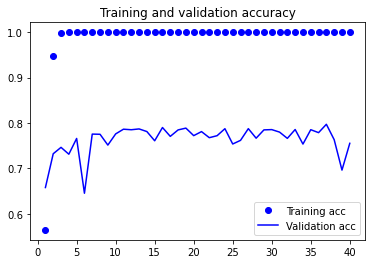

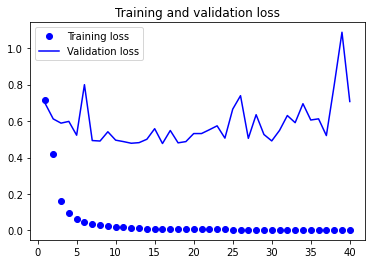

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Validation accuracy still did not exceed 80%. So in our case, pre-trained word embeddings do outperform jointly learned embeddings. If you increase the number of training samples to a few thousand, this will quickly stop being the case - try it as an assignment.

Finally, let's evaluate the model on the test data. First, we will need to tokenize the test data:

In [19]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding ="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

And let's load and evaluate the first model:

In [20]:
model.load_weights(glove_dir + '/' + 'pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.5032 - acc: 0.7904


[0.5032393336296082, 0.7904000282287598]

We get not yet satisfactory test accuracy of ~79%, which is far away from our expectations. Working with just a handful of training samples is hard!

After this introduction, we will use much more efficient recurrent models to sequential data to achieve better results in the near future.

## Assignments (optional, for extra points, not required)

* Use more training samples than 2000, e.g. 5000, 10000, or 15000, and compare how it influences the results and the system performance?
* Use more than 100 words of each review and compare results to what we achieved here.
* Try to change hyperparameters of the models (a number of neurons in the hidden dense layer (32), the activation function (relu), etc. and compare the results.
* Try to use the other available word embeddings on the https://nlp.stanford.edu/projects/glove/ website and compare the achieved results.
